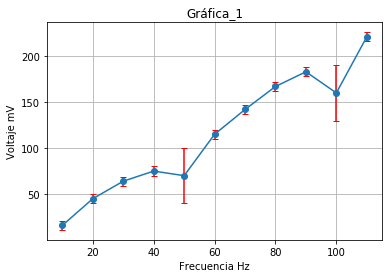

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize
#%matplotlib inline

#Datos

x = (10, 20, 30, 40, 50 ,60, 70, 80, 90, 100, 110)
y = (16, 45, 64, 75, 70, 115, 142, 167, 183, 160, 221)
y_error = (5, 5, 5, 5, 30, 5, 5, 5, 5, 30, 5)

#gráfica

fig, ax = plt.subplots()
ax. errorbar(x, y, y_error, marker = 'o', ecolor = 'red', capsize = 3)

plt.xlabel('Frecuencia Hz')
plt.ylabel('Voltaje mV')
plt.grid()
plt.title('Gráfica_1')
plt.show()

In [0]:
#2.Ajustes de datos experimentales 

n = len(x)
x = np.array(x)
y = np.array(y)
sumx = sum(x)
sumy = sum(y)
sumx2 = sum(x*x)
sumy2 = sum(y*y)
sumxy = sum(x*y)
promx = sum(x)/n
promy = sum(y)/n

In [29]:
m = (sumx*sumy - n*sumxy)/(sumx**2 - n*sumx2)
b = promy - m*promx

m,b

(1.9072727272727272, -0.07272727272727764)

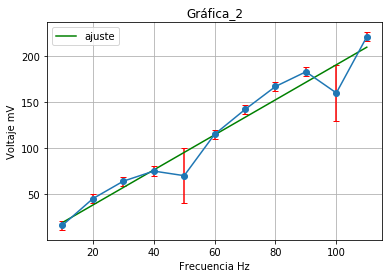

In [30]:
y_ajus = m*x + b
fig, ax = plt.subplots()
ax. errorbar(x, y, y_error, marker = 'o', ecolor = 'red', capsize = 3)

plt.plot(x, y_ajus, '-g', label = 'ajuste')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Voltaje mV')
plt.grid()
plt.legend()
plt.title('Gráfica_2')
plt.show()

Parámetro de ajuste encontrado: popt [-0.07272727  1.90727273]
Error estimado del parámetro de ajuste encontrado: pcov [[10.16995803         nan]
 [        nan  0.14994789]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


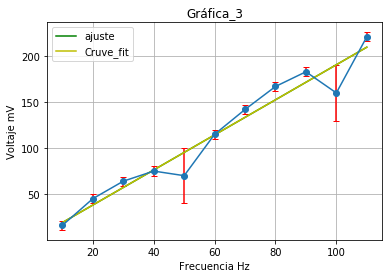

In [56]:
#3.usar curve_fit
def funy(x,b,m):
  return m*x + b

popt,pcov = curve_fit(funy,x,y)
print('Parámetro de ajuste encontrado:','popt',popt) 
print('Error estimado del parámetro de ajuste encontrado:','pcov',np.sqrt(pcov))


fig, ax = plt.subplots()
ax. errorbar(x, y, y_error, marker = 'o', ecolor = 'red', capsize = 3)

plt.plot(x, y_ajus, '-g', label = 'ajuste')
plt.plot(x,funy(x,*popt),'-y', label='Cruve_fit')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Voltaje mV')
plt.grid()
plt.legend()
plt.title('Gráfica_3')
plt.show()

In [58]:
#4.determinar la desviación estandar
h = abs((popt[1]*x + popt[0]) - y)
e = np.std(h)

print('la desviación estandar de los datos con respecto al ajuste es',e)
print('el promedio del error de los datos tomados es de',sum(y_error)/n)

la desviación estandar de los datos con respecto al ajuste es 9.094066469038747
el promedio del error de los datos tomados es de 9.545454545454545


vemos que haciendo una comparacion de la desviación estándar y el promedio de error, es muy cercano el resultado. Esos nos da indicios de que los errores no son aleatorios...almenos en esta toma de datos experimentales

In [0]:
#5.Determinar el error en los parametros
chi = sum(y-(popt[1]*x + popt[0]))**2

chi_N = (1/(n-2))*chi

In [0]:
error_a = np.sqrt(chi_N/n*np.var(x))

error_b = error_a*np.sqrt(promx)

In [80]:
print(error_a,error_b)

4.069631704856914e-09 3.152323163621705e-08


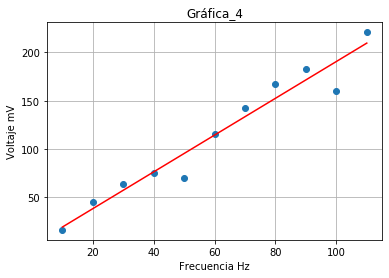

In [87]:
#6.Gráfica de los residuos
plt.plot(x,y,'o')
plt.plot(x,y_ajus,'r-')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Voltaje mV')
plt.grid()
plt.title('Gráfica_4')
plt.show()

No, los puntos no están aleatoriamente ubicados, de hecho todos los puntos parecen estar de forma sistematica. A excepcion de 2 puntos, que dan la casualidad de ser las 2 mediciones con mayor margen de error en nuestro sistema. Incluso podemos remover esos dos puntos y la linea estaría un poco más atravezada a los puntos...en conclusión podemos afirmar que los dos puntos fue un error de medición, probablemente del sujeto que estaba tomando los datos.

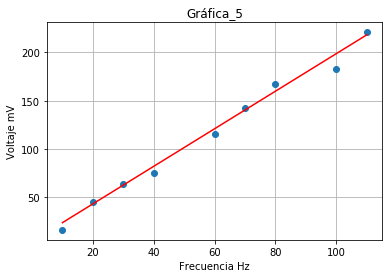

In [88]:
x1 = (10, 20, 30, 40,60, 70, 80, 100, 110)
y1 = (16, 45, 64, 75, 115, 142, 167, 183, 221)

n = len(x1)
x1 = np.array(x1)
y1 = np.array(y1)
sumx1 = sum(x1)
sumy1 = sum(y1)
sumx21 = sum(x1*x1)
sumy21 = sum(y1*y1)
sumxy1 = sum(x1*y1)
promx1 = sum(x1)/n
promy1 = sum(y1)/n

m1 = (sumx1*sumy1 - n*sumxy1)/(sumx1**2 - n*sumx21)
b1 = promy1 - m*promx1

y_ajus1 = m1*x1 + b1

plt.plot(x1,y1,'o')
plt.plot(x1,y_ajus1,'r-')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Voltaje mV')
plt.grid()
plt.title('Gráfica_5')
plt.show()